## Model Training

In [47]:
# import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

warnings.filterwarnings('ignore')

In [5]:
# load dataset
df = pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df.shape

(1000, 8)

### Prepare X and Y variables

In [6]:
X = df.drop(columns=['math_score'],axis=1)

In [7]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [8]:
Y =df['math_score']

In [9]:
Y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [10]:
# create columns Transformer with 3 types transformers

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
onehot_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",onehot_transformer, cat_features),
        ("StandardScaler",numeric_transformer, num_features)
    ]



)

In [12]:
X =preprocessor.fit_transform(X)


In [13]:
X.shape

(1000, 19)

In [15]:
# Separate dateset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


In [16]:
x_train.shape, x_test.shape

((800, 19), (200, 19))

#### Create and evaluate function to give all metrics after model training

In [17]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [33]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "RandomForest Regressor": RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "SVR" : SVR()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train) # Train model
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # evaluate train and test dateset
    
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model performance for Training set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
          
    print("---------------------------------------------------------")
    
    print("Model performance for Testing set")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print("="*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3268
- Mean Absolute Error: 4.2755
- R2 Score: 0.8741
---------------------------------------------------------
Model performance for Testing set
- Root Mean Squared Error: 5.4175
- Mean Absolute Error: 4.2252
- R2 Score: 0.8794


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
---------------------------------------------------------
Model performance for Testing set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
---------------------------------------------------------
Model performance for Testing set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.2795
- 

In [35]:
pd.DataFrame(list(zip(model_list,r2_list)), columns=['Model Name',"R2 Score"]).sort_values(by=['R2 Score'],ascending=False)

,Model Name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.879390
6,AdaBoost Regressor,0.852423
4,RandomForest Regressor,0.848362
1,Lasso,0.825320
5,XGBRegressor,0.821589
7,SVR,0.728600
3,Decision Tree,0.727478


### Linear Regression


In [44]:
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(x_train,y_train)
y_pred =lr_model.predict(x_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the Model is %.2f" %score)

Accuracy of the Model is 87.94


### Plot Y_pred and y_test

Text(0, 0.5, 'Predicted')

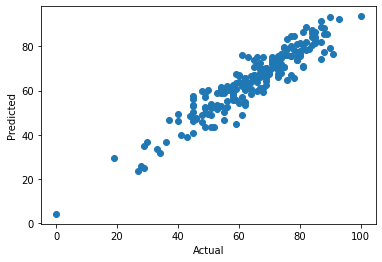

In [45]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel('Predicted')

<AxesSubplot:xlabel='math_score'>

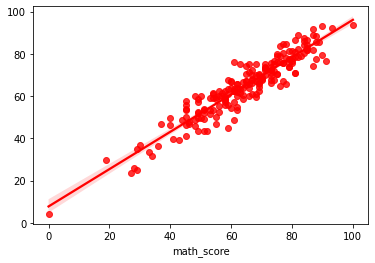

In [48]:
sns.regplot(x=y_test,y=y_pred,color='red')

In [49]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.593750,14.406250
737,53,58.914062,-5.914062
740,80,76.687500,3.312500
660,74,76.750000,-2.750000
411,84,87.375000,-3.375000
...,...,...,...
408,52,43.328125,8.671875
332,62,62.023438,-0.023438
208,74,67.843750,6.156250
613,65,67.257812,-2.257812
